<a href="https://colab.research.google.com/github/gauravvojha/Cognifyz_DataScience_task1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [ ]:
df = pd.read_csv('/content/restaurant_data.csv')

# Explore the dataset

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# Check for missing values

In [ ]:
print(df.isnull().sum())

Restaurant ID            0
Restaurant Name          0
Country Code             0
City                     0
Address                  0
Locality                 0
Locality Verbose         0
Longitude                0
Latitude                 0
Cuisines                10
Average Cost for two     1
Currency                 1
Has Table booking        1
Has Online delivery      1
Is delivering now        1
Switch to order menu     1
Price range              1
Aggregate rating         1
Rating color             1
Rating text              1
Votes                    1
dtype: int64


# Handle missing values (if any)

In [ ]:
df = df.dropna()

# Identify categorical variables

In [ ]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


# Convert categorical variables to numeric using one-hot encoding

In [ ]:
df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Feature selection (example: selecting some columns for the prediction)

In [ ]:
features = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes']
target = ['Aggregate rating']

# Ensure that the selected features are in the DataFrame

In [ ]:
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Missing features: {missing_features}")
    # Handle missing features appropriately, for example, by removing them from the list
    features = [feature for feature in features if feature in df.columns]


Missing features: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


# Ensure the target column is in the DataFrame

In [ ]:
target = 'Aggregate rating'
if target not in df.columns:
    raise ValueError(f"Target column '{target}' is missing from the DataFrame.")

# Split the dataset into features (X) and target (y)

In [ ]:
# Verify the column names in your DataFrame
print(df.columns)

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes',
       'Restaurant Name_#InstaFreeze', 'Restaurant Name_'Ohana',
       ...
       'Rating color_Green', 'Rating color_Orange', 'Rating color_Red',
       'Rating color_White', 'Rating color_Yellow', 'Rating text_Excellent',
       'Rating text_Good', 'Rating text_Not rated', 'Rating text_Poor',
       'Rating text_Very Good'],
      dtype='object', length=10641)


In [ ]:
features = ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
           'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
target = ['Aggregate rating']

In [ ]:
X = df[features]
y = df[target]

# Ensure all data in X is numeric

In [ ]:
if any(X.dtypes == 'object'):
    print("There are still non-numeric columns in the dataset.")
else:
    print("All features are numeric.")

All features are numeric.


# Check the shapes of X and y before splitting

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (4401, 8)
Shape of y: (4401, 1)


# Align the indices of X and y

In [ ]:
common_indices = X.index.intersection(y.index)
X = X.loc[common_indices]
y = y.loc[common_indices]

# Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure there are no non-numeric columns in X

In [ ]:
for column in X.columns:
    if X[column].dtype == 'object':
        print(f"Non-numeric data found in column: {column}")

# Identify and handle non-numeric columns

In [ ]:
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index([], dtype='object')


# Use

OneHotEncoder

to handle categorical features

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[non_numeric_columns]))
X_encoded.columns = encoder.get_feature_names_out(non_numeric_columns)

# Drop original categorical columns and concatenate encoded features

In [ ]:
X = X.drop(non_numeric_columns, axis=1)
X = pd.concat([X, X_encoded], axis=1)

# Initialize the models

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Verify the shapes of your feature matrix and target variable

In [ ]:
print(X.shape)
print(y.shape)

(4410, 8)
(4401, 1)


# Train the models and evaluate their performance

In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}
    print(f"{model_name} - MSE: {mse:.4f}, R2: {r2:.4f}")

Linear Regression - MSE: 0.0000, R2: 1.0000
Decision Tree - MSE: 0.0000, R2: 1.0000


<ipython-input-145-ad057e7aa874>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest - MSE: 0.0000, R2: 1.0000


# Compare the models' performance

In [ ]:
results_df = pd.DataFrame(results).T
print(results_df)

                            MSE        R2
Linear Regression  3.024719e-27  1.000000
Decision Tree      1.135074e-05  0.999994
Random Forest      4.654257e-05  0.999974


# Visualize the results

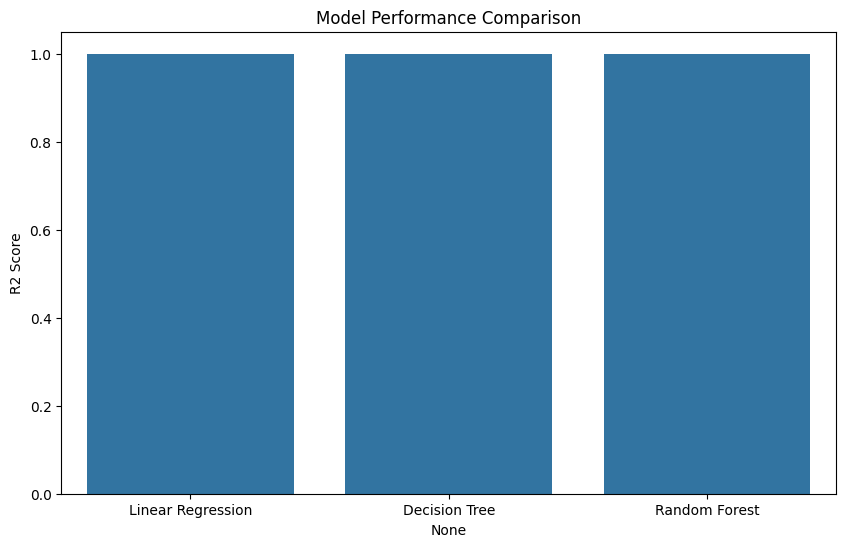

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2'])
plt.title('Model Performance Comparison')
plt.ylabel('R2 Score')
plt.show()